In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/', one_hot=True)

/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sangyongjia/anaconda3/en

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print('train data size: ',mnist.train.num_examples,
         'validation data size: ', mnist.validation.num_examples,
         'test data size: ', mnist.test.num_examples)
print('train images shape: ', mnist.train.images.shape,
         'labels shape: ',mnist.train.labels.shape)
print(len(mnist.train.images[0]))
print(mnist.train.images[0].shape)
print(mnist.train.images[0])
print(mnist.train.images[0].reshape(28,28))


train data size:  55000 validation data size:  5000 test data size:  10000
train images shape:  (55000, 784) labels shape:  (55000, 10)
784
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

In [4]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28), cmap='binary')
    plt.show()
plot_image(mnist.train.images[1])
plot_image(mnist.train.images[20000])

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


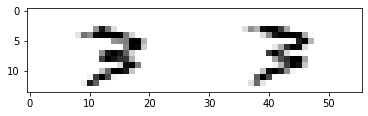

In [5]:
#进一步了解reshape()
import numpy as np
int_array = np.array([i for i in range(64)])
print(int_array)
int_array.reshape(8,8)
int_array.reshape(4,16)
plt.imshow(mnist.train.images[20000].reshape(14,56), cmap='binary')
print(mnist.train.labels[1])
print(np.argmax(mnist.train.labels[1]))
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=10)#一次批量读取多条数据；#next_batch()实现内部会对数据集先做shuffle


In [6]:
#交叉熵损失函数
#𝑳𝒐𝒔𝒔 = −sigma(𝒚 * log𝑦′ )其中: 𝒚 为标签值， 𝑦′为预测值

In [11]:
##模型保存
save_step=5 #存储模型的粒度
import os #创建保存模型文件的目录
ckpt_dir = './ckpt_dir'
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)
saver = tf.train.Saver()

#超参数
train_epochs = 5
learning_rate = 0.01
batch_size = 50
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 2
'''#定义变量
W = tf.Variable(tf.random_normal([784, 10]), name='W')  #random_normal 了解下
b = tf.Variable(tf.zeros([10]), name='b')
forward = tf.matmul(x, W) + b
pred = tf.nn.softmax(forward)'''
##构建模型
#占位符
x = tf.placeholder(tf.float32, [None , 784], name='X')
y = tf.placeholder(tf.float32, [None, 10], name='Y')
#构建隐层1
H1_NN = 256
W1 = tf.Variable(tf.random_normal([784, H1_NN]), name='W1')  #random_normal 了解下
b1 = tf.Variable(tf.zeros([H1_NN]), name='b1')
Y1 = tf.nn.relu(tf.matmul(x,W1)+b1)
#构建隐层2
H2_NN = 64
W2 = tf.Variable(tf.truncated_normal([H1_NN, H2_NN], stddev=0.1),name='W2')
b2 = tf.Variable(tf.zeros([H2_NN]), name='b2')
Y2 =  tf.nn.relu(tf.matmul(Y1,W2) + b2)

#构建输出层
W3 = tf.Variable(tf.truncated_normal([H2_NN, 10], stddev=0.1), name='W3')
b3 = tf.Variable(tf.zeros([10]))
forward = tf.matmul(Y2, W3) + b3
pred = tf.nn.softmax(forward)


#***交叉熵损失函数; tensorflow 提供了softmax_cross_entropy_with_logits函数，用于避免因为log（0）值为NaN造成的数据不稳定。
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))# reduction_indices 含义是？
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=forward,labels=y)) # 注意此处是forward不是pred；换成pred效果很差！！！
#***优化器；不同的优化器，效果差距还是很大的，使用GradientDescentOptimizer最高智能到93%，Adam能超过97%，但是计算速度明显偏慢
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)#梯度下降 
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)#梯度下降 
#定义准确率
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))#检查预测类别tf.argmax(pred,1)与实际类别tf.argmax(y,1)的匹配情况 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))#讲布尔值转化为浮点数，并计算平均值。


from time import time
startTime = time()
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
#训练模型
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: xs, y: ys})
        
    loss,acc = sess.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    if (epoch+1) % display_step == 0:
        print('Train Epoch:', '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss), 'Accuracy=', '{:.4}'.format(acc))
    if (epoch+1) % save_step == 0:
        saver.save(sess, os.path.join(ckpt_dir, 'mnist_h256_model_{:06d}.ckpt'.format(epoch+1)))#模型保存
        print('mnist_h256_model_{:06d}.ckpt saved'.format(epoch+1))
    saver.save(sess, os.path.join(ckpt_dir,'mnist_h256_model.ckpt'))#模型保存
#显示运行时间
duration = time() - startTime
print('Train Finished! cost time:','{:.2f}'.format(duration))
#多层效果不一定就比单层的网络效好
        

Train Epoch: 02 Loss= 0.210910887 Accuracy= 0.9482
Train Epoch: 04 Loss= 0.179488495 Accuracy= 0.9656
mnist_h256_model_000005.ckpt saved
Train Finished! cost time: 23.19


In [7]:
###读取还原模型; 跳过，未还原成功，原因是变量名未命名成功。
#创建saver
ckpt_dir = './ckpt_dir'
saver = tf.train.Saver()
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
ckpt = tf.train.get_checkpoint_state(ckpt_dir)
if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path)#从已保存的模型中读取参数
    print('Restore model from' + ckpt.model_checkpoint_path)

INFO:tensorflow:Restoring parameters from ./ckpt_dir/mnist_h256_model.ckpt


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_2 not found in checkpoint
	 [[node save_2/RestoreV2 (defined at <ipython-input-7-4d5b13ae9641>:4) ]]

Caused by op 'save_2/RestoreV2', defined at:
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/asyncio/base_events.py", line 528, in run_forever
    self._run_once()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/asyncio/base_events.py", line 1764, in _run_once
    handle._run()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-4d5b13ae9641>", line 4, in <module>
    saver = tf.train.Saver()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 832, in __init__
    self.build()
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 844, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 881, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 513, in _build_internal
    restore_sequentially, reshape)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 332, in _AddRestoreOps
    restore_sequentially)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 580, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1572, in restore_v2
    name=name)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Users/sangyongjia/anaconda3/envs/tf1.x/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_2 not found in checkpoint
	 [[node save_2/RestoreV2 (defined at <ipython-input-7-4d5b13ae9641>:4) ]]


In [10]:
ckpt
ckpt.model_checkpoint_path

'./ckpt_dir/mnist_h256_model.ckpt'

In [9]:
type(ckpt)

tensorflow.python.training.checkpoint_state_pb2.CheckpointState

In [76]:
accu_validation = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
print('Validation Accuracy:', accu_validation)

accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print('Test Accuracy:', accu_test)

Validation Accuracy: 0.9684
Test Accuracy: 0.9628


In [5]:
##### 重构以上代码内容
#####重构梳理下思路，并未使用此部分代码
#定义全链接层函数
def  fcn_layer(inputs,  input_dim, output_dim, activation):
    W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1))
    b = tf.Variable(tf.zeros([output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs
##构建模型
#输入输出
x = tf.placeholder(tf.float32, [None , 784], name='X')
y = tf.placeholder(tf.float32, [None, 10], name='Y')
#隐藏层
h1 = fcn_layer(x, input_dim=784, output_dim=256, activation=tf.nn.relu)
h2 = fcn_layer(h1, input_dim=256, output_dim=64, activation=tf.nn.relu)
#输出层
forward = fcn_layer(inputs=h2, input_dim=64, output_dim=10, activation=None)
pred = tf.nn.softmax(forward)

In [67]:
#找出错误项
prediction_result = sess.run(tf.argmax(pred,1), feed_dict={x: mnist.test.images})
compare_lists = prediction_result==np.argmax(mnist.test.labels,1)
err_list = [i for i in range(len(compare_lists)) if compare_lists[i]==False]
print(err_list, len(err_list))
#定义个输出错误分类的函数
def print_predict_errs(labels, prediction):
    count = 0
    compare_lists = (prediction==np.argmax(labels, 1))
    err_lists = [i for i in range(len(compare_lists)) if compare_lists[i]==False]
    for x in err_lists:
        print('index='+str(x)+'标签值=', np.argmax(labels[x]), '预测值=', prediction[x])
        count = count + 1
    print('总计：' + str(count))
print_predict_errs(labels=mnist.test.labels, prediction=prediction_result)
    


[115, 217, 241, 247, 250, 259, 321, 340, 381, 445, 465, 582, 583, 613, 631, 674, 691, 720, 740, 839, 844, 846, 853, 882, 938, 947, 951, 956, 957, 1014, 1032, 1039, 1044, 1112, 1114, 1173, 1178, 1182, 1194, 1219, 1226, 1242, 1247, 1270, 1289, 1299, 1319, 1326, 1328, 1364, 1393, 1425, 1464, 1500, 1522, 1527, 1530, 1549, 1553, 1581, 1621, 1681, 1716, 1790, 1800, 1901, 1941, 2004, 2016, 2043, 2044, 2053, 2098, 2109, 2125, 2130, 2135, 2148, 2162, 2168, 2293, 2305, 2308, 2358, 2369, 2377, 2387, 2422, 2425, 2433, 2447, 2462, 2488, 2582, 2597, 2607, 2648, 2654, 2671, 2743, 2769, 2810, 2836, 2915, 2921, 2939, 2953, 2975, 2995, 3023, 3055, 3073, 3145, 3225, 3229, 3289, 3330, 3333, 3405, 3422, 3441, 3451, 3475, 3490, 3503, 3516, 3520, 3550, 3558, 3559, 3574, 3681, 3702, 3710, 3757, 3767, 3776, 3778, 3780, 3796, 3808, 3818, 3838, 3853, 3876, 3893, 3941, 3946, 3976, 3995, 4065, 4163, 4176, 4199, 4205, 4224, 4289, 4297, 4335, 4359, 4382, 4419, 4443, 4497, 4500, 4508, 4528, 4540, 4551, 4567, 4571, 46

In [63]:
compare_lists
prediction_result

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
#应用模型
prediction_result = sess.run(tf.argmax(pred,1), feed_dict = {x: mnist.test.images})
prediction_result

array([7, 2, 1, ..., 4, 5, 6])

In [42]:
#定义可视化函数
import matplotlib.pyplot as plt
import numpy as np
def plot_image_labels_prediction(images, labels, prediction, index, num=10):
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    if num > 25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, i+1)
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary')
        title = 'label='+str(np.argmax(labels[index]))
        if len(prediction) > 0:
            title+=',predict='+str(prediction[index])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index +=1
    plt.show()

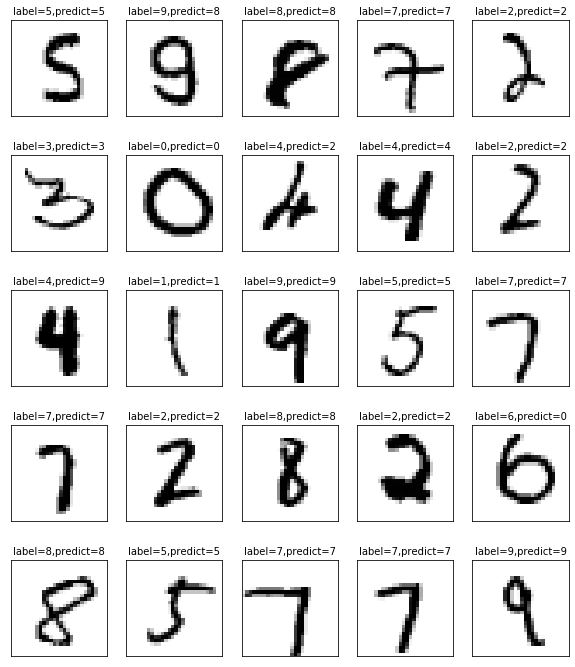

In [68]:
plot_image_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 240, num=25)

[-1.5700593  -1.2447991   0.90740865 -0.62509966  0.0947462  -0.31167227
  1.8423011  -1.7172214   0.8506169   0.9697004 ]


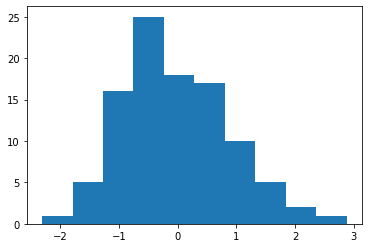

In [8]:
#了解下tf.random_normal()
norm = tf.random_normal([100])
with tf.Session() as sess:
    norm_data = norm.eval()
print(norm_data[:10])
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()